In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp

import matplotlib as mpl
import seaborn as sns

from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='D2Coding')
sns.set(font='D2Coding', rc={'axes.unicode_minus':False}, style='darkgrid')

import statsmodels.api as sm #안쓸지도
import sklearn as sk

### 합성곱 신경망 이미지 분류

In [3]:
from tensorflow import keras
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [7]:
train_scaled.shape, val_scaled.shape

((48000, 28, 28, 1), (12000, 28, 28, 1))

#### 합성곱 신경망 생성

In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
# 2개씩 줄이고 줄여서 28, 28이니까 14, 14가 됨 그걸 32개 만드는거고.
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [15]:
model.add(keras.layers.Flatten()) # 7*7*64 + 64
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)              

In [18]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


모델 컴파일 훈련

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True, verbose=1)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), 
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.5226 - accuracy: 0.8139
Epoch 1: val_loss improved from inf to 0.32970, saving model to best_cnn_model.h5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.5225 - accuracy: 0.8140 - val_loss: 0.3297 - val_accuracy: 0.8806
Epoch 2/20
1499/1500 [============================>.] - ETA: 0s - loss: 0.3504 - accuracy: 0.8739
Epoch 2: val_loss improved from 0.32970 to 0.27868, saving model to best_cnn_model.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3503 - accuracy: 0.8739 - val_loss: 0.2787 - val_accuracy: 0.8949
Epoch 3/20
1500/1500 [==============================] - ETA: 0s - loss: 0.3006 - accuracy: 0.8905
Epoch 3: val_loss improved from 0.27868 to 0.26563, saving model to best_cnn_model.h5
1500/1500 [==============================] - 39s 26ms/step - loss: 0.3006 - accuracy: 0.8905 - val_loss: 0.2656 - val_accuracy: 0.9009
Epoch 4/20
1499/1500 [=========================

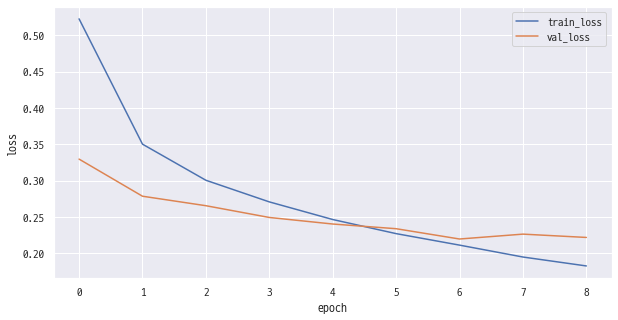

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [21]:
early_stopping_cb.stopped_epoch

8

In [22]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2198 - accuracy: 0.9192


[0.21984705328941345, 0.9191666841506958]

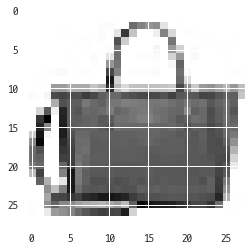

In [23]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')

예측하기

In [24]:
result = model.predict(val_scaled[0:1])
result

1/1 [==============================] - 0s 90ms/step


array([[3.3092451e-15, 1.3472932e-19, 1.0959863e-17, 1.6548577e-16,
        1.8290512e-16, 1.3687274e-14, 2.0698303e-15, 1.1381868e-15,
        1.0000000e+00, 6.3871651e-14]], dtype=float32)

In [25]:
val_labels = np.argmax(model.predict(val_scaled[0:1]), axis=-1)
val_labels

1/1 [==============================] - 0s 46ms/step


array([8], dtype=int64)

오 성공

In [26]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵클부츠']

In [28]:
print(classes[np.argmax(result)])
#classes[8], np.argmax(result) = 8


가방
